# Pymaceuticals Inc.
---

### Analysis

#### Introduction
A study was conducted by Pymaceuticals Inc., to compare Capomlin to several other competitors drugs to study potential treatments for squamous cell carcinoma (SCC), a comonly occuring form of skin cancer. The study observed a number of mice who were identified with SCC tumors and recieved treatment over the course of 45 days where tumor development was observed and measured. Although several treatments were used in the study, the following four treatments were given the most focus:
- Capomulin
- Ramicane
- Infubinol
- Ceftamin

#### Study Subjects
    The study consisted of roughly an equal number male and female mice at 51% and 49% repectively (see fig 2).
    Each mouse started with a tumor size of 45 cubic millimeters(mm3).
    The age of the mice ranged from 1 month to 24 months.
    The weight of the mice ranged from 15 grams(g) to 30 grams(g).
    The timepoint range was set to be 45 days. However, some of the mice in the study had a maximum timepoint less than 45 days and should have been excluded for more consistent results.   

#### Summary of the Analysis
    Capomulin and Ramicene had the lowest average tumor volume at 40.675 and 40.261 respectively, while Infubinol and Ceftamin had values of 52.88 and 52.59 respectively.
    Capomulin and Ramicane had roughly the same number of mice tested and had more mice tested than Infubinol and Ceftamin (see fig 1.)
    Capomulin, Ramicane, and Ceftamin had no outliers regarding the tumor volume at the maximum timepoint. Infubinol had one outlier regarding the tumor volumne at the maximum timepoint. However, the maximum timepoint did not reach 45 days and shouldn't be included in the study (see fig 3.).
    Mouse b128 showed the smallest sized tumor between 30 and 40 days with an increase of size at 45 days.
    There is a correlation of tumor size to mouse weight where the tumor size increses as the mouse weight increases. 
    
#### Overall Summary:
Overall, Capomulin and Ramicane performed equally well over the study. Infubinol and Ceftamin only performed as well as the placebo, which looks to be they are ineffective. Further studies need to be done with regard to mouse weight versus tumor size and extending the time of the study as the tumor retreated in size for the first 30 - 40 days but increased at the 45 day mark.
    
 

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = study_results.merge(mouse_metadata, on='Mouse ID')
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()[0]
mouse_study_df.loc[mouse_study_df['Mouse ID'] == mouse_id]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cdf = mouse_study_df.drop(mouse_study_df[mouse_study_df['Mouse ID'] == mouse_id].index, axis=0)
mouse_study_cdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cdf['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_study_summ_df = pd.DataFrame({'Mean Tumor Volume'     : mouse_study_cdf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean(numeric_only=True),
                                    'Median Tumor Volume'   : mouse_study_cdf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median(numeric_only=True),
                                    'Tumor Volume Variance' : mouse_study_cdf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var(numeric_only=True),
                                    'Tumor Volume Std. Dev.': mouse_study_cdf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std(numeric_only=True), 
                                    'Tumor Volume Std. Err.': mouse_study_cdf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem(numeric_only=True) 
                                    })
mouse_study_summ_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_study_agg_df = pd.DataFrame(mouse_study_cdf.groupby('Drug Regimen')
                                                 .agg({'Tumor Volume (mm3)': [('mean','mean'),
                                                                              ('median','median'),
                                                                              ('var','var'),
                                                                              ('std','std'),
                                                                              ('sem','sem')
                                                                             ]
                                                       })
                                 )       
mouse_study_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

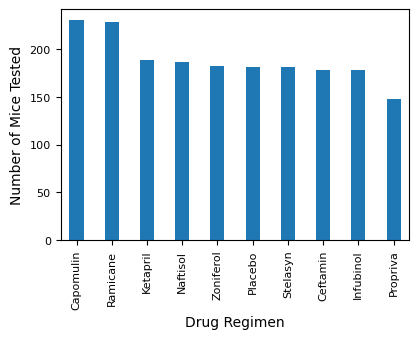

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_df = mouse_study_cdf.groupby('Drug Regimen')[['Timepoint']].count().sort_values('Timepoint'
                                                                                    , ascending=False)
plot_df.plot(kind='bar'
            ,legend=False
            ,figsize=(4.5,3)
            ,ylabel='Number of Mice Tested'
            ,fontsize=8
            ,width=.4
            )

plt.tight_layout
plt.show()

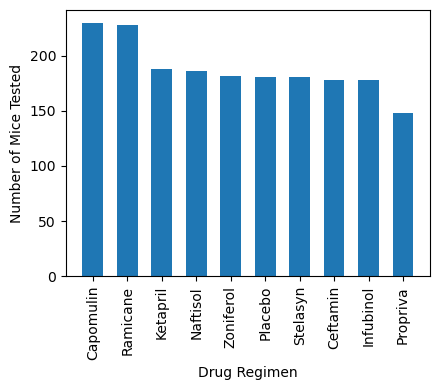

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = range(len(plot_df.index))
tick_locations = [value for value in x_axis]
y_axis = [t for t in plot_df['Timepoint']]

plt.figure(figsize=(4.5,4))
plt.xticks(tick_locations,plot_df.index, rotation='vertical' )
plt.bar(x_axis, y_axis, width=.6)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.tight_layout()
plt.show()

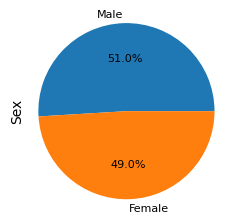

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fvm_s = mouse_study_cdf['Sex'].value_counts()

fig, ax = plt.subplots(facecolor=(1,1,1,0))
fvm_s.plot(kind='pie'
           ,autopct='%1.1f%%'
           ,legend=False
           ,figsize=(2.5,2.5)
           ,fontsize=8
          )

plt.axis('equal')
plt.show()

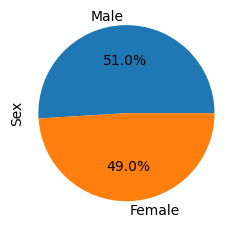

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = fvm_s.index
sizes = fvm_s.values

fig,ax = plt.subplots(figsize=(2.5,2.5), facecolor=(1,1,1,0))
plt.pie(sizes
       ,labels=labels
       ,autopct='%1.1f%%'
       )

plt.ylabel(fvm_s.name)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_gp = mouse_study_cdf.groupby('Mouse ID') ['Timepoint'].max().astype(int).to_frame('Max Timepoint')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_mdf = pd.merge(mouse_study_cdf
                          ,max_timepoint_gp
                          ,how='left'
                          ,left_on= ['Mouse ID', 'Timepoint']
                          ,right_on = ['Mouse ID', 'Max Timepoint']
                          )

last_tumor_volume = mouse_study_mdf.loc[(mouse_study_mdf['Timepoint'] == mouse_study_mdf['Max Timepoint'])]

last_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
9,b128,45,38.982878,2,Capomulin,Female,9,22,45.0
10,f932,0,45.000000,0,Ketapril,Male,15,29,0.0
18,g107,35,71.905117,0,Ketapril,Female,2,29,35.0
21,a457,10,49.783419,0,Ketapril,Female,11,30,10.0
30,c819,40,62.175705,1,Ketapril,Male,21,25,40.0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for r in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = mouse_study_mdf['Tumor Volume (mm3)'].loc[(mouse_study_mdf['Drug Regimen'] == r) \
                                         & (mouse_study_mdf['Timepoint'] == mouse_study_mdf['Max Timepoint'])]
       
    # add subset 
    subset = pd.Series(tumor_vol_data)

    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25,.5,.75])
    
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    p_outlier = ([n for n in mouse_study_mdf['Tumor Volume (mm3)'].loc[(mouse_study_mdf['Drug Regimen'] == r) \
                                         & ((mouse_study_mdf['Tumor Volume (mm3)'] < lower_bound) | \
                                            (mouse_study_mdf['Tumor Volume (mm3)'] > upper_bound))]
                ])
                  
    print( r + "'s potential outliers: " + str(*p_outlier))
    

Capomulin's potential outliers: 
Ramicane's potential outliers: 
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: 


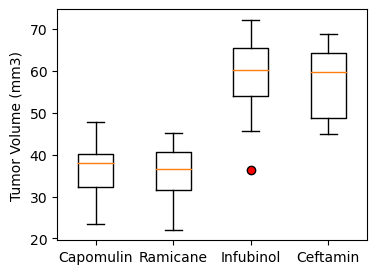

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
t_vol={}
for r in treatments:
    t_vol[r] = last_tumor_volume['Tumor Volume (mm3)'].loc[(last_tumor_volume['Drug Regimen']==r)]

fig, ax = plt.subplots(figsize=(4,3))
p = plt.boxplot(t_vol.values())
ax.set_xticklabels(t_vol.keys())
plt.ylabel('Tumor Volume (mm3)')
plt.setp(p['fliers'], markerfacecolor='red', markeredgecolor='black')

plt.show()

## Line and Scatter Plots

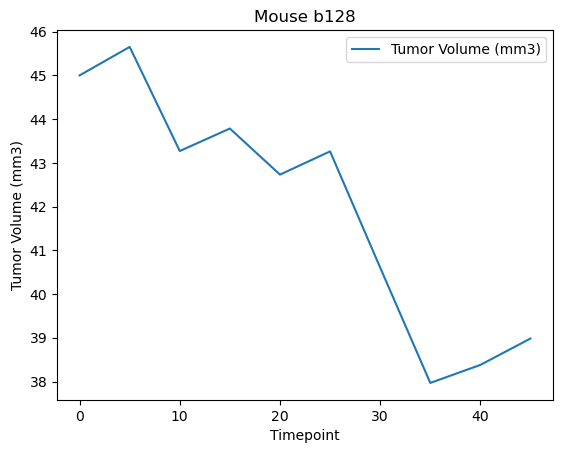

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = mouse_study_cdf.loc[:,['Timepoint','Tumor Volume (mm3)']] \
                        .loc[mouse_study_cdf['Mouse ID']=='b128'].set_index('Timepoint')

cap_df.plot(title='Mouse b128'
           ,ylabel=cap_df.columns[0]
           )

plt.show()

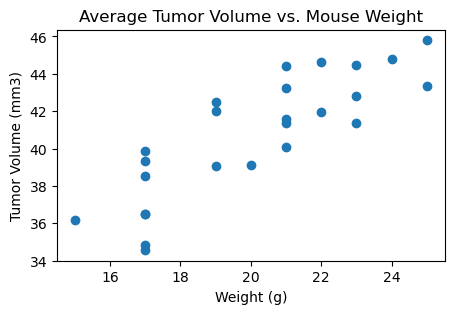

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tvw_df = mouse_study_cdf.loc[mouse_study_cdf['Drug Regimen'] == 'Capomulin'] \
                        .groupby(['Mouse ID','Weight (g)'], as_index=False)[['Tumor Volume (mm3)']].mean()

plt.figure(figsize=(5,3))
plt.scatter(tvw_df['Weight (g)']
           ,tvw_df['Tumor Volume (mm3)']
           ,marker = 'o'
           )

plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel(tvw_df.columns[1])
plt.ylabel(tvw_df.columns[2])

plt.show()

## Correlation and Regression

Correlation is 0.84


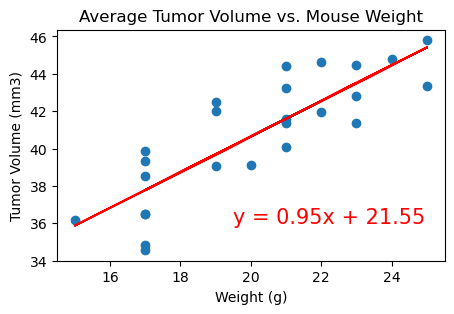

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = tvw_df['Weight (g)']
atv = tvw_df['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,atv)
print(f'Correlation is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, atv)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
p_fit = weight * slope + intercept

plt.figure(figsize=(5,3))
plt.scatter(tvw_df['Weight (g)']
           ,tvw_df['Tumor Volume (mm3)']
           ,marker = 'o'
           )

plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel(tvw_df.columns[1])
plt.ylabel(tvw_df.columns[2])
plt.plot(weight, p_fit, 'r-')
plt.annotate(line_eq,(19.5,36),fontsize=15,color="red")

plt.show()